## Solving the Fair Transfer plan equation

$$ f_i s_i/w_i = \sum_{j\neq i} f_j s_j/(1-w_j) $$
Or, with $a_i=\frac{1}{1-w_i}$ ($a_i\geq0$):
$$ f_i s_i a_i = (a_i-1)\sum_{j\neq i} f_j s_j a_j $$

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

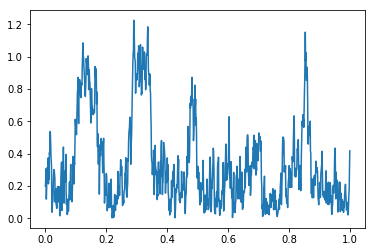

In [28]:
X = np.ones(1000)*.04
for i in range(999):
    X[i+1] = abs(X[i] + .01*(.04 - X[i]) + .2*np.sqrt(X[i])*np.random.normal())
X = np.sqrt(X)

plt.plot(np.arange(0,1,1/len(X)), X)
    

In [25]:
import pyperclip
pyperclip.copy(pd.DataFrame([np.arange(0,1,1/len(X)), X]).T.to_csv(sep='\t', header=None, index=False))

In [56]:
from scipy import integrate
VaR = lambda a: -stats.norm.ppf(a, loc=1)
CVaR = lambda a: integrate.quad(lambda x: VaR(x), 0, a)[0]/a
CVaR(.4)

-0.03414366626609545

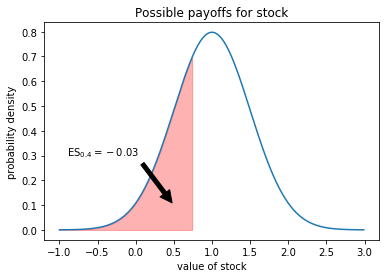

In [58]:
x = np.arange(-1,3,.01)
y = stats.norm.pdf(x, 1, .5)

x_ = np.arange(min(x), 1 + stats.norm.ppf(.4), .01)
y_ = stats.norm.pdf(x_, 1, .5)

fig, ax = plt.subplots()

ax.plot(x,y)
ax.fill_between(x_, y_, color='red', alpha=.3)
ax.annotate('ES$_{0.4}=-0.03$', (.5, .1), (-.9, .3)
            , arrowprops=dict(facecolor='black', shrink=0.05)
            )
ax.set_title('Possible payoffs for stock')
ax.set_xlabel('value of stock')
ax.set_ylabel('probability density')
plt.savefig(r'D:\stack\scriptie\presentatie\es.png')

In [37]:
stats.norm.ppf(.15)

-1.0364333894937898